# Medical Cost Personal Insurance Project

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesClassifier,ExtraTreesRegressor 


In [16]:
file_path='C:/Users/Lenova/INSURANCE COST DATA.txt'

In [17]:
df=pd.read_csv(file_path)

In [18]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [19]:
print('Number of rows:', df.shape[0]," ",'Number of columns:', df.shape[1]) 

Number of rows: 1338   Number of columns: 7


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [21]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [22]:
df.describe(include=['object'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [23]:
df.duplicated().sum()

1

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

Visualizing The Data

Distribution of charges

<Axes: xlabel='charges', ylabel='Density'>

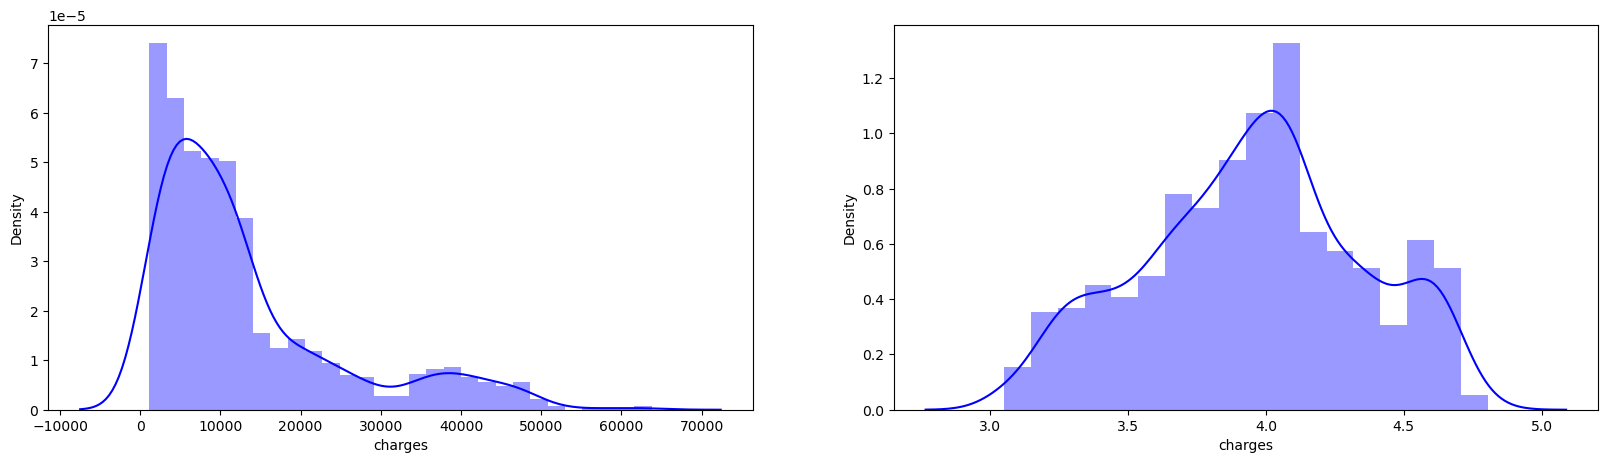

In [26]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(df.charges, color = 'b')
plt.subplot(1,2,2)
sns.distplot(np.log10(df.charges), color = 'b')

Visualizing distribution of numerical variables vs medical charges

Text(0.5, 1.0, 'Distribution of BMI')

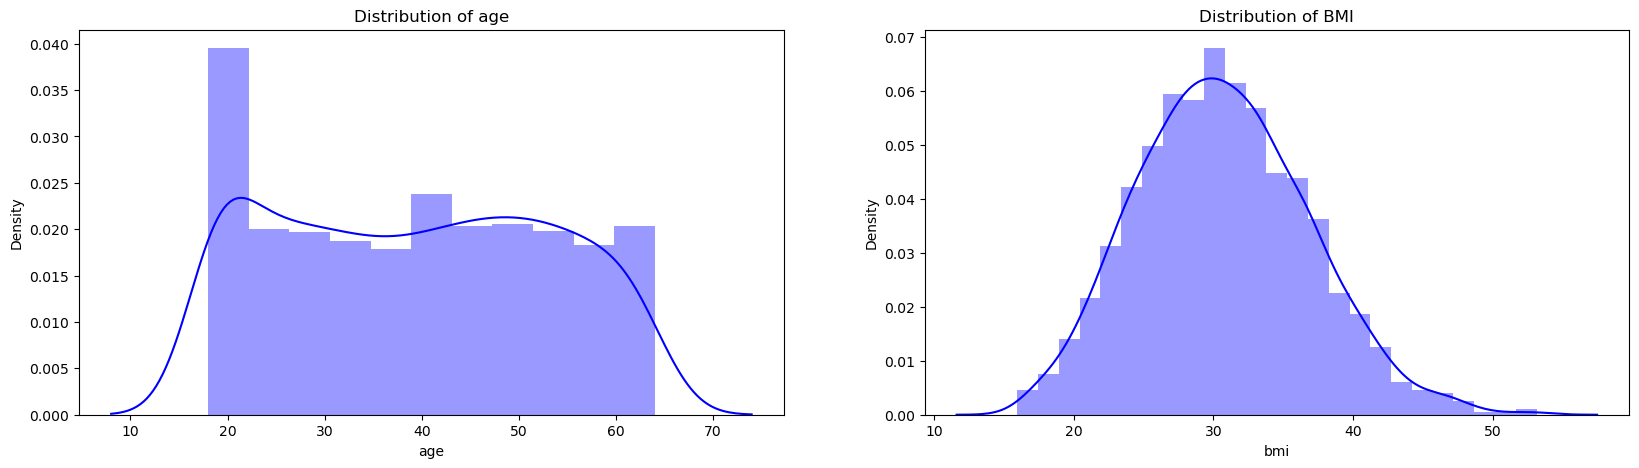

In [27]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(df.age, color = 'b').set_title('Distribution of age')

plt.subplot(1,2,2)
sns.distplot(df.bmi, color = 'b').set_title('Distribution of BMI')

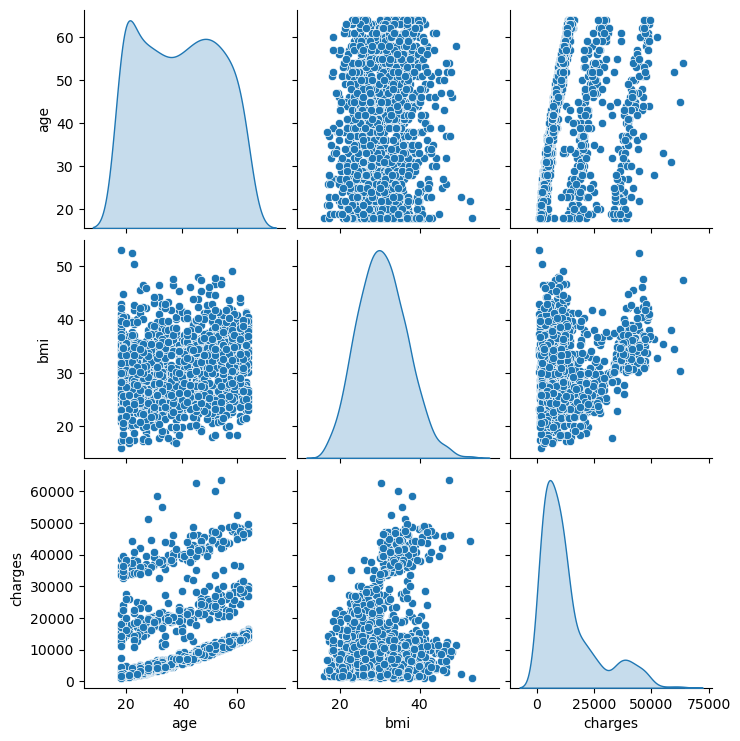

In [28]:
df_num = df[['age','bmi','charges']]
sns.pairplot(df_num, diag_kind = 'kde')
plt.show()

The pairplot reveals that there is a linear relationship between age, bmi with charges

Visualizing categorical variables individually vs medical charges

<Axes: xlabel='smoker', ylabel='charges'>

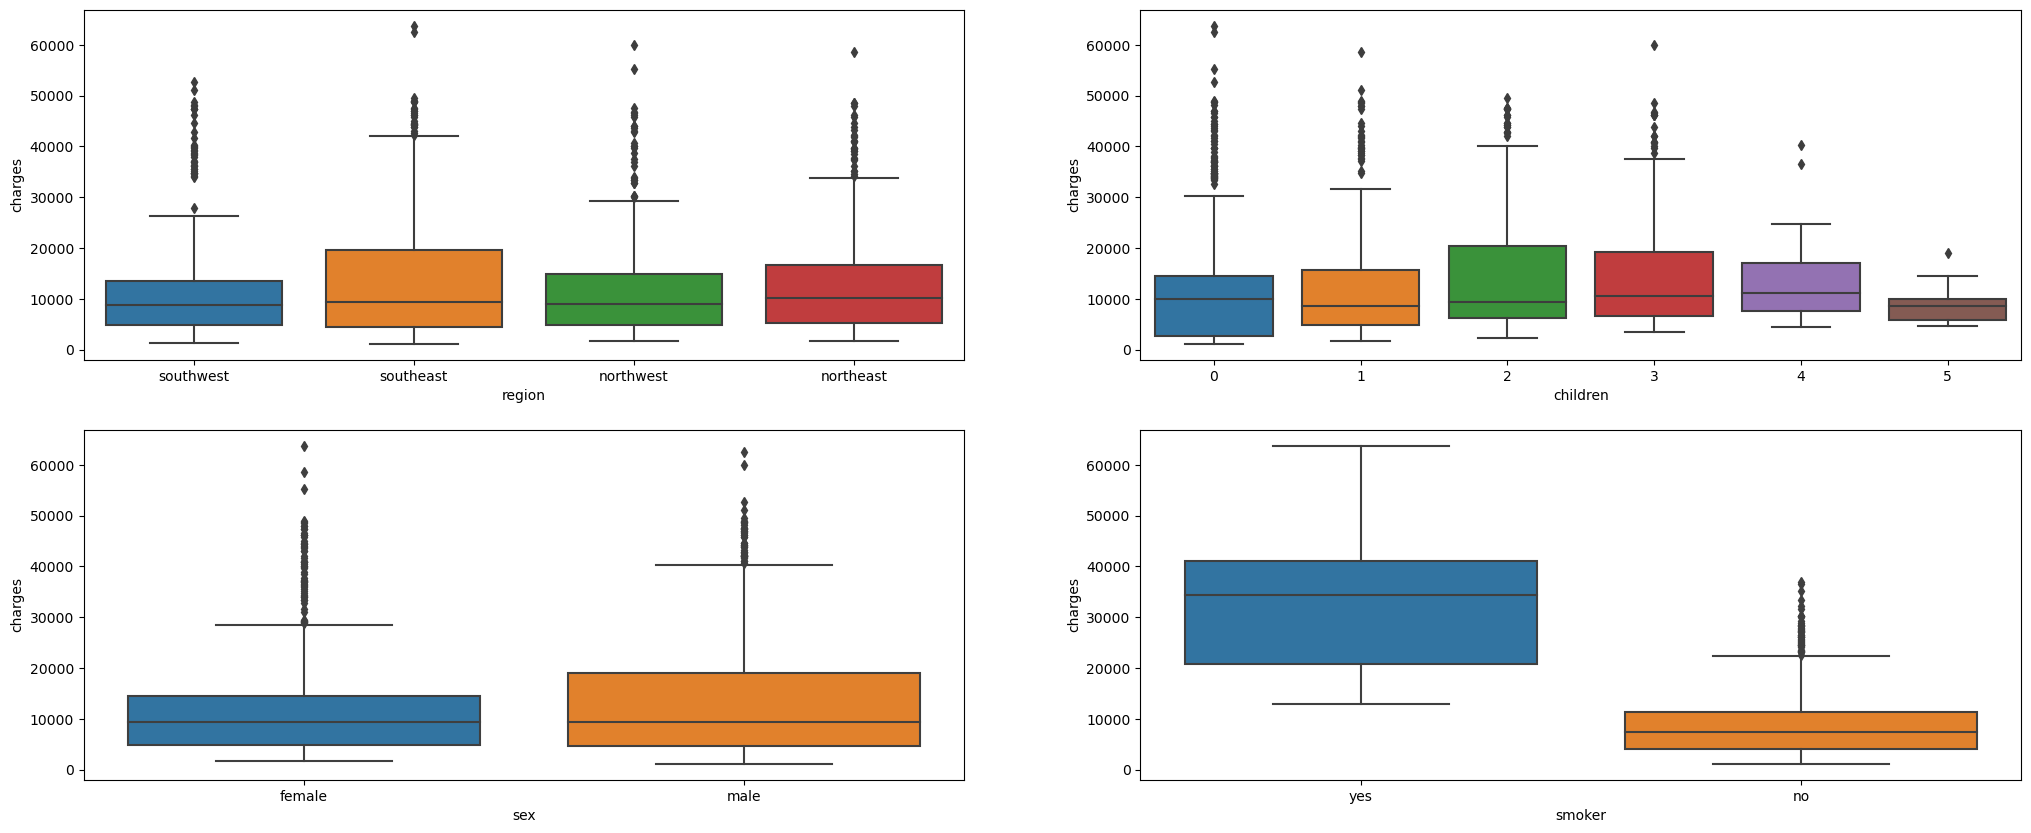

In [29]:
plt.figure (figsize = (25,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'region', y = 'charges', data = df)

plt.subplot(2,2,2)
sns.boxplot(x = 'children', y = 'charges', data = df)

plt.subplot(2,2,3)
sns.boxplot(x = 'sex', y = 'charges', data = df)

plt.subplot(2,2,4)
sns.boxplot(x = 'smoker', y = 'charges', data = df)


Based on the box plots above, we can derive some inferences on the categorical variables:

Region: Compared to all regions, Southeast region has the highest data distribution between the 50th and 75th percentile.
Children: Among all the others, individuals with 2 children have the highest distribution between the 50th and 75th percentile.
Gender: The data is a little bit biased towards males as the interquartile range for male is higher compare to that for female. The data representation for male to female is 50.5 to 49.5.
Smoking behavior: Approximately 21% of our data comprises of smokers. The median is high for smokers, in comparison to those that do not smoke.
Now that we have looked at the effect of individual variables on medical charges, let's look at effect of a combination of factors on medical charges.

Bi-Variate Analysis:Charges by region

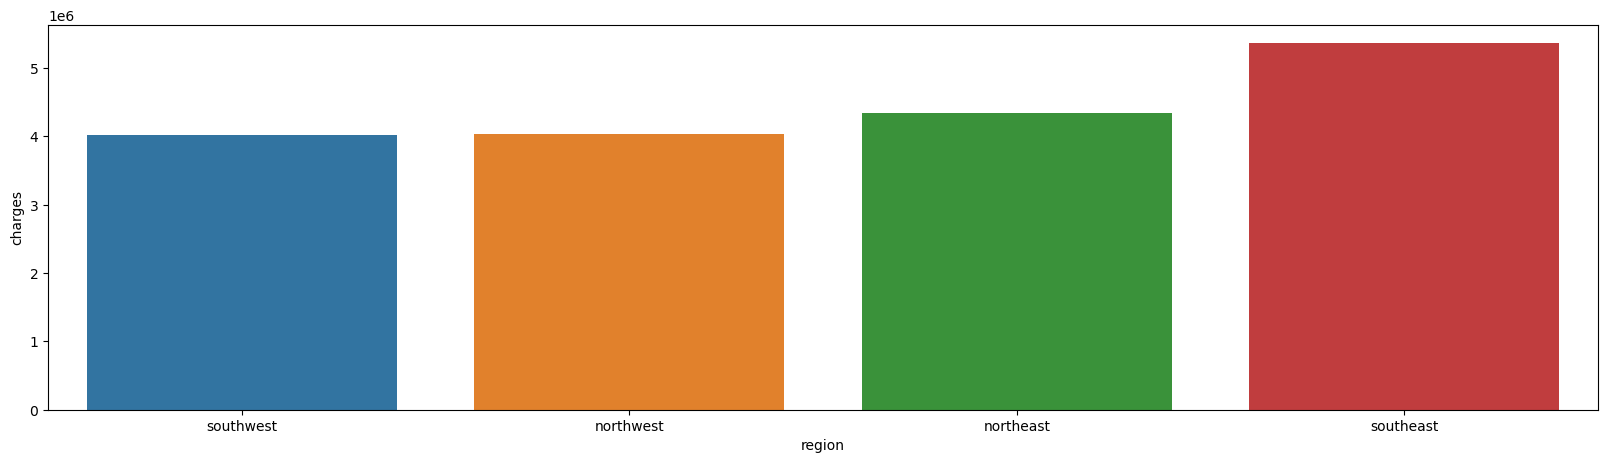

In [31]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
plt.figure(figsize=(20,5))
ax = sns.barplot(x = charges.index, y = charges)

The highest amount of charges are in the Southeast while the lowest are in the Southwest. Based on this, let's see how charges change by region when accounting for other factors, such as number of children, gender, and smoking behavior.

Charges by region and number of children


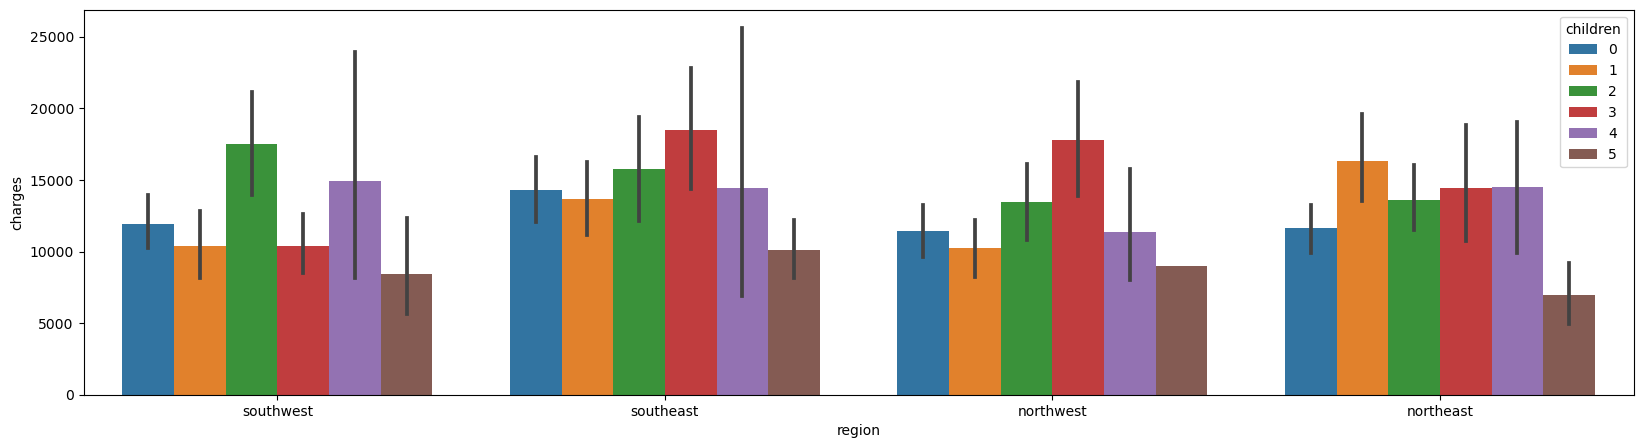

In [32]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'children', data = df)


It seems that there is not a statistical difference in terms of how the number of children in a particular region affects charges.

<Axes: xlabel='region', ylabel='charges'>

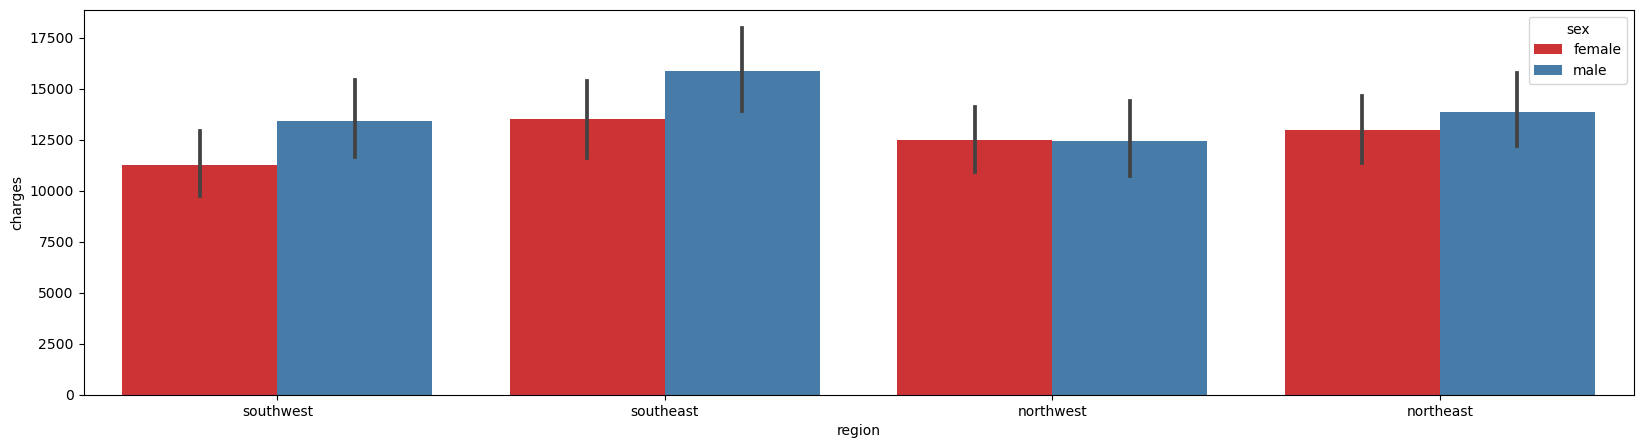

In [34]:
plt.figure(figsize=(20,5))
sns.barplot(x = 'region', y = 'charges', hue = 'sex', data = df, palette = 'Set1')

Again, similar to the previous graph, it seems that there is not a statistical difference in terms of how gender in a particular region affects charges

Charges by region and smoking behavior

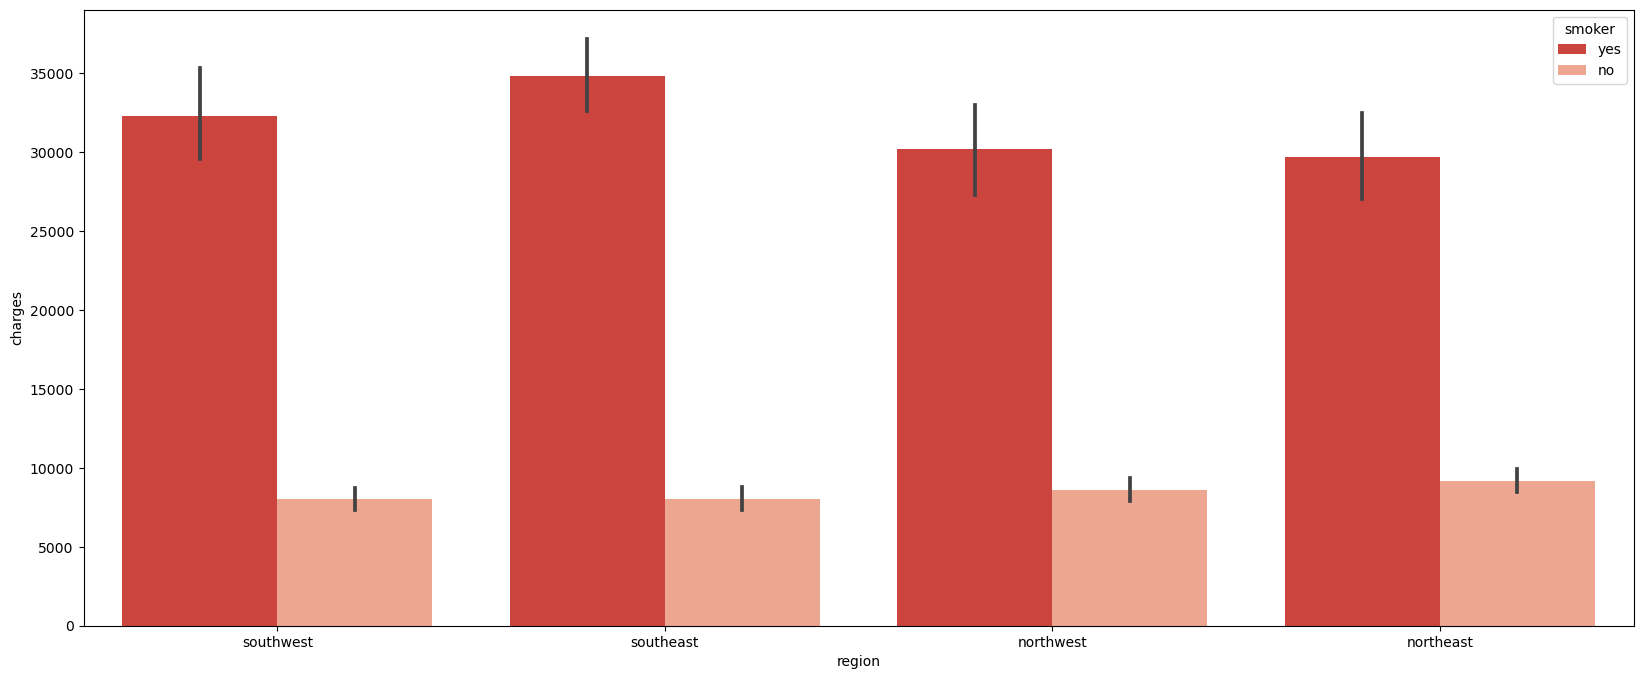

In [35]:
f, ax = plt.subplots(1, 1, figsize = (20, 8))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = df, palette = 'Reds_r')

In contrast to the other factors, there seems to be a statistical significance in terms of how smoking behavior in a region affects charges.

From these bar charts, we can see that smoking behavior by region significantly affected medical charges. So, let's see the correlation between non-categorical variables (age, bmi, and children) with medical charges (evaluated based on smoking behavior).

Charges by age, bmi, and children based on smoking behavior

Text(0.5, 1.0, 'Number of children vs Medical Charges')

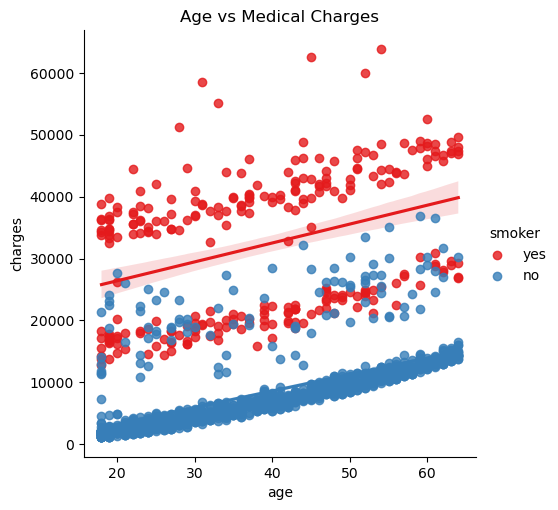

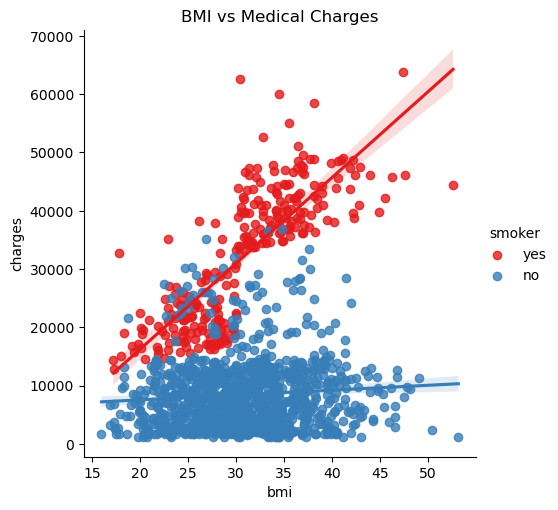

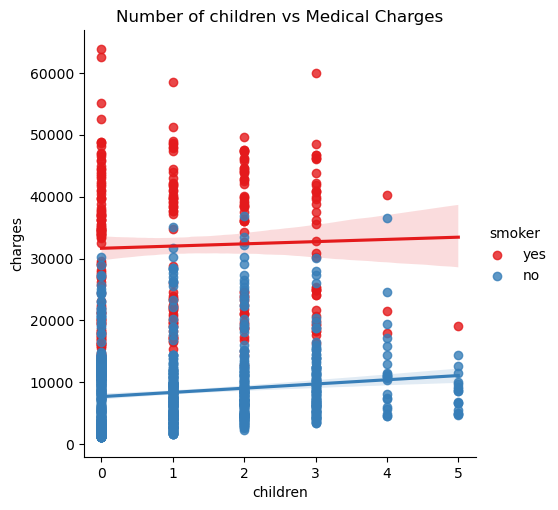

In [36]:
ax = sns.lmplot(x = 'age', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Age vs Medical Charges')

ax = sns.lmplot(x = 'bmi', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('BMI vs Medical Charges')

ax = sns.lmplot(x = 'children', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Number of children vs Medical Charges')

Based on the analysis,

We know that smoking has a great impact on medical costs. Smoking in combination with an increase in other factors, such as age, bmi, and children, further emphasizes and increases the medical cost due to smoking.

Data Correlation

To confirm our findings, let's look at the correlation between all the columns by constructing a pairplot and correlation heatmap.

In order to do so, we need to first convert all object labels into categorical variables and then convert them to numerical values.

In [37]:
df[['region','sex','smoker']] = df[['region','sex','smoker']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [38]:
label = LabelEncoder()

label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

df.dtypes


age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [39]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


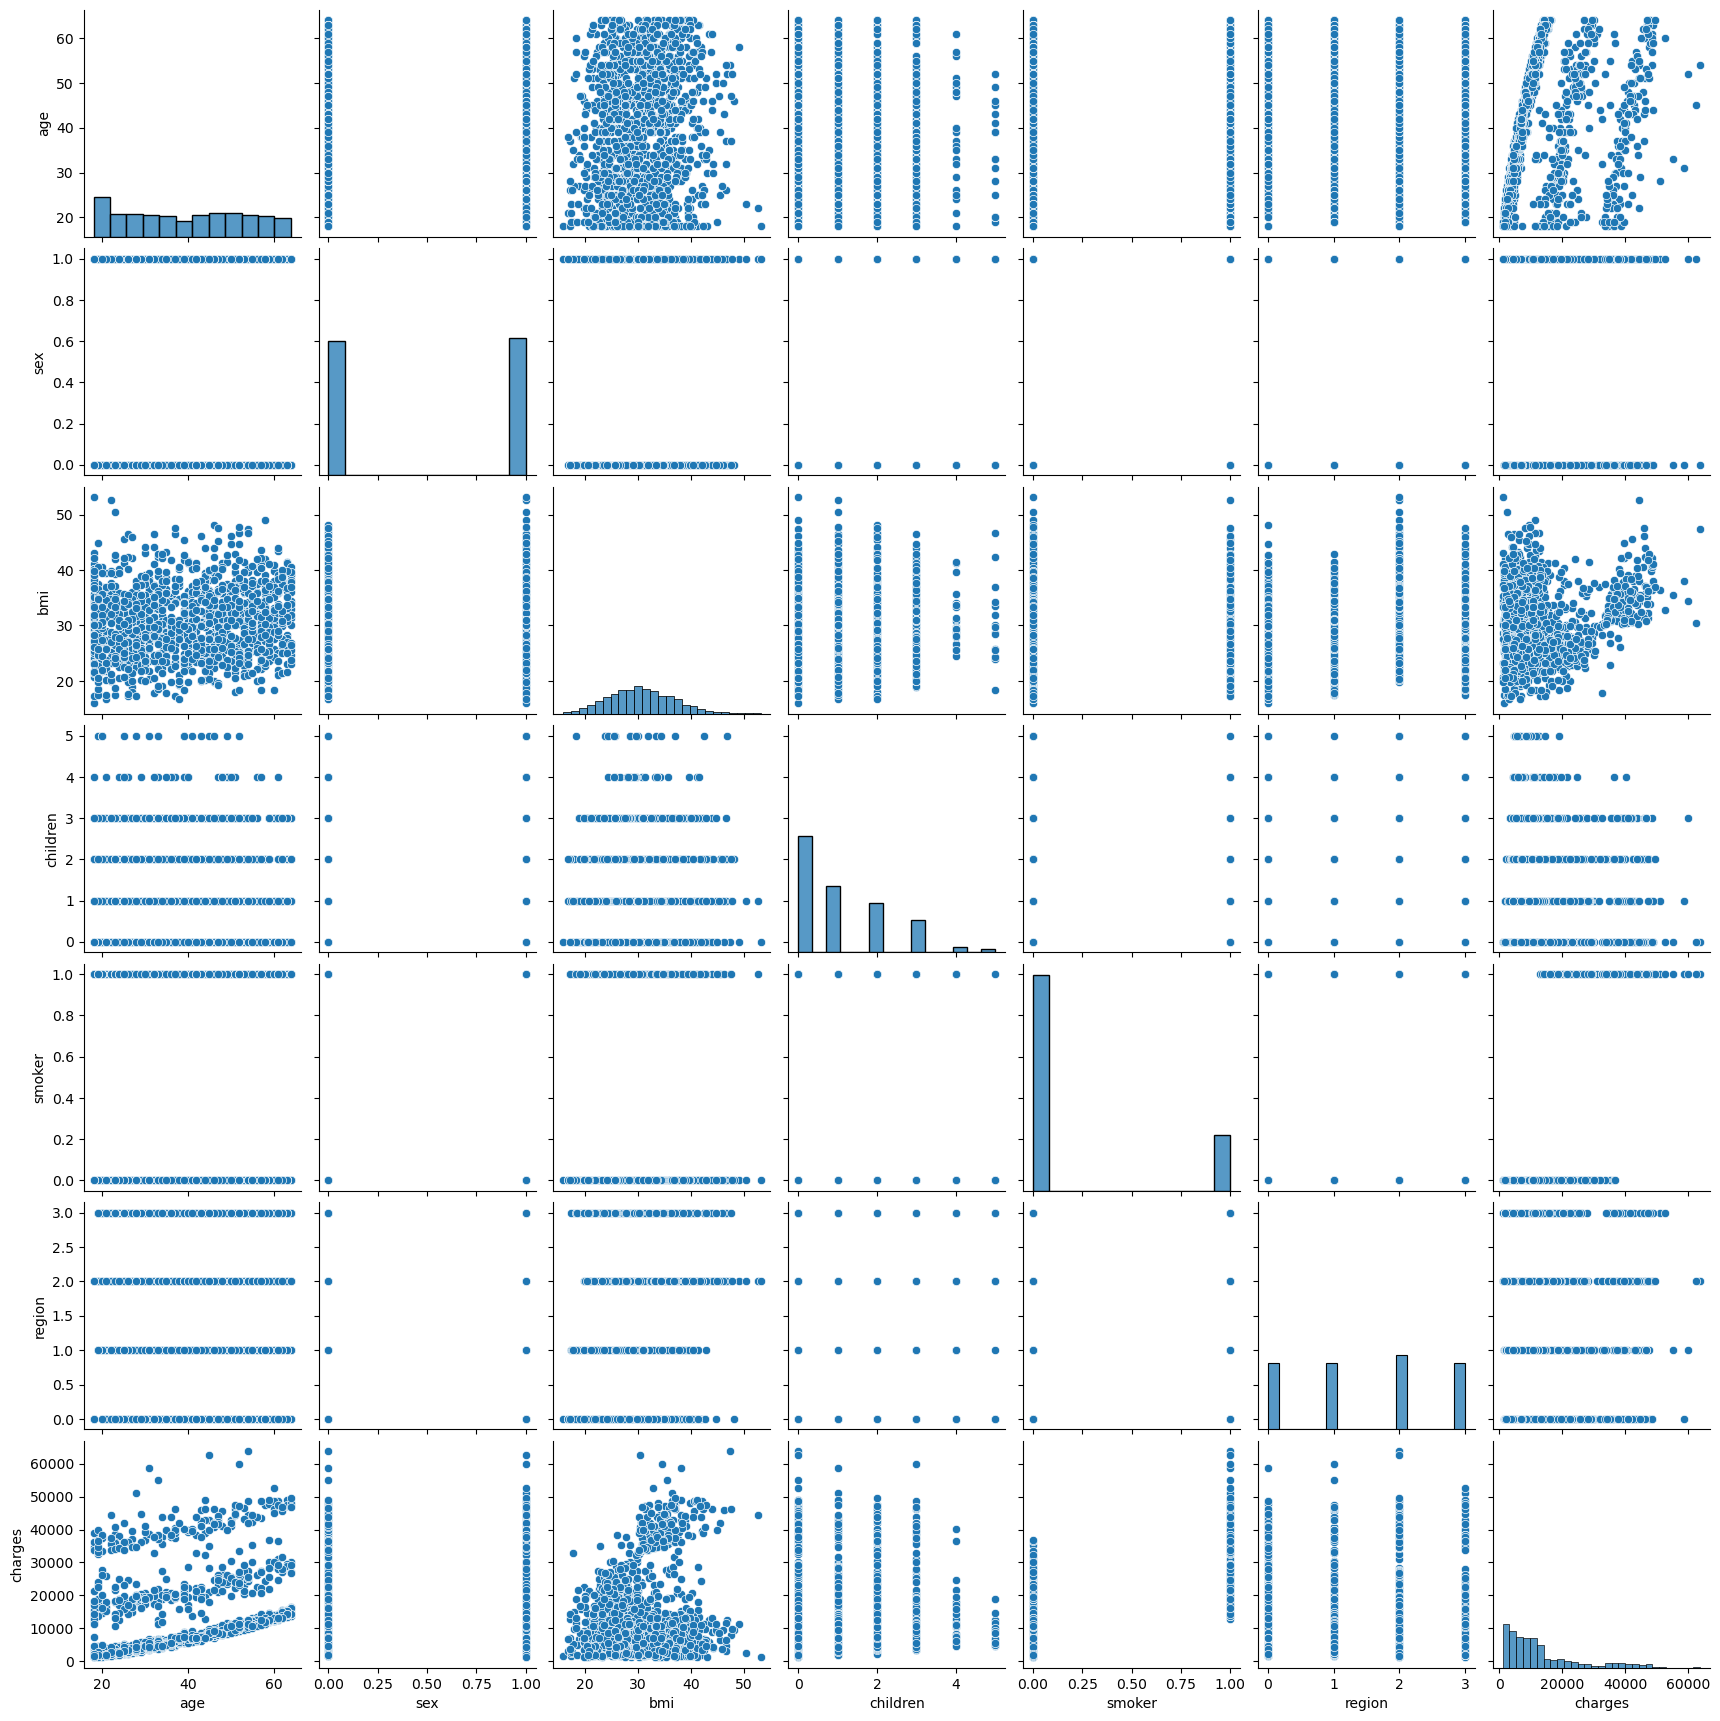

In [40]:
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation Factors Heat Map')

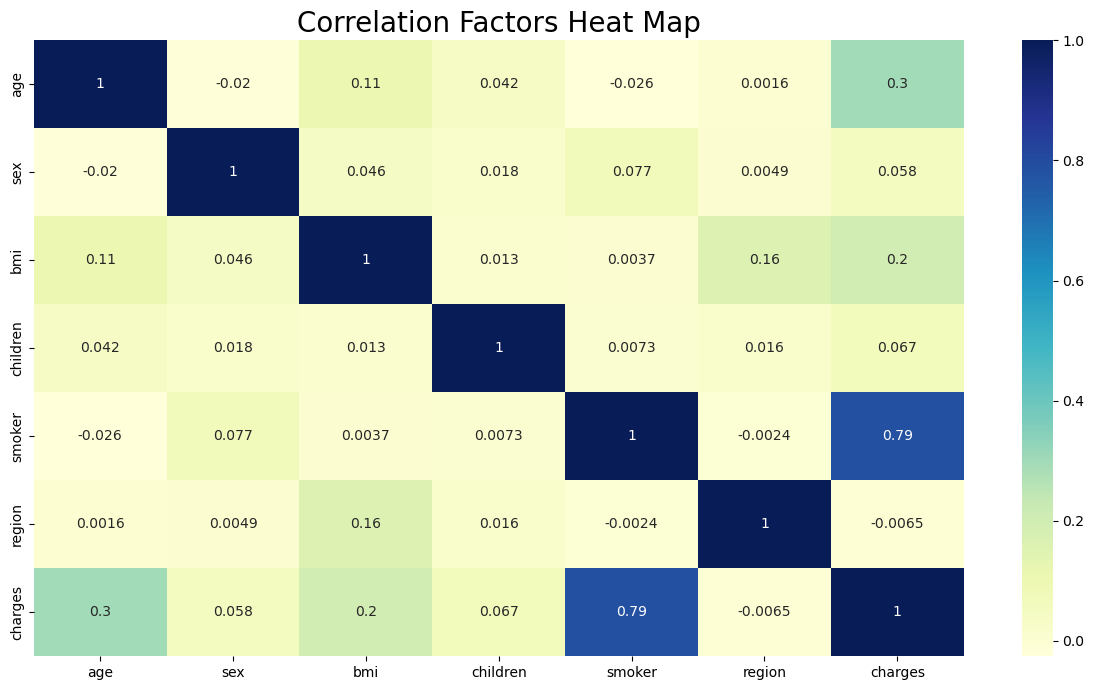

In [41]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu').set_title('Correlation Factors Heat Map', size = '20')

The heatmap shows the variables that are multicollinear in nature and the variables that have high collinearity with the target varible (charges).

This reveals that smoking behavior, followed by age and bmi, are greatly correlated with medical charges.


Preparing Data for Machine Learning

In [42]:
X = df.drop('charges', axis = 1)
y = df['charges']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=0)

# Model Building

Linear Regression

In [45]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.7526726290709554
MAE 4400.502490291575


Best Fit Line

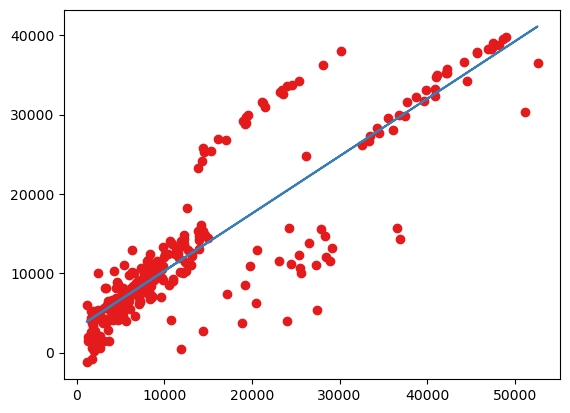

In [46]:
palette = "Set1"
sns.set_palette(palette)
plt.plot(y_test,y_pred,'o')
m,b = np.polyfit(y_test,y_pred,1)
plt.plot(y_test,m*y_test+b)
plt.show()

# Ridge Regression

In [47]:
R = Ridge(alpha=10)
R.fit(X_train,y_train)
y_pred = R.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.750129548718422
MAE 4508.836007618554


# Lasso Regression

In [48]:
L = Lasso(alpha=0.001)
L.fit(X_train,y_train)
y_pred = L.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.7526726303757756
MAE 4400.502800096362


# Decision Tree Regression

In [49]:
DT = DecisionTreeRegressor(max_depth=3)
DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.830552712192923
MAE 3222.1058103515056


# Random Forest Regression

In [50]:
RF = RandomForestRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.75,
                             max_features=0.75,
                             max_depth=15)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8441502558295858
MAE 2852.234054562688


# Extra Tree Regression

In [51]:
ET = ExtraTreesRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=15,
                           bootstrap=True)

ET.fit(X_train,y_train)
y_pred = ET.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8448254320064397
MAE 3028.0972342050354


# ADA Boost Regressor

In [52]:
AB = AdaBoostRegressor(n_estimators=100,learning_rate=1.0)
AB.fit(X_train,y_train)
y_pred = AB.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8074009054315576
MAE 4732.343887306118


# Gradient Boosting Regressor

In [53]:
GB = GradientBoostingRegressor(n_estimators=100)
GB.fit(X_train,y_train)
y_pred = GB.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8482973165628628
MAE 2768.1581939803436


# DataFrame of all the model and MAE


In [55]:
models = {
    'Linear Regression': LR,
    'Ridge': R,
    'Lasso': L,
    'Decision Tree':DT,
    'Random Forest': RF,
    'Extra Trees': ET,
    'AdaBoost': AB,
    'Gradient Boosting': GB,

}

# Create an empty dataframe
results_df = pd.DataFrame(columns=['Model', 'R2 Score', 'MAE'])

# Iterate over each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate R2 score and MAE
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Append the results to the dataframe
    results_df = results_df.append({'Model': model_name, 'R2 Score': r2, 'MAE': mae}, ignore_index=True)

In [56]:

results_df

,Model,R2 Score,MAE
0,Linear Regression,0.752673,4400.502490
1,Ridge,0.750130,4508.836008
2,Lasso,0.752673,4400.502800
3,Decision Tree,0.830553,3222.105810
4,Random Forest,0.844150,2852.234055
5,Extra Trees,0.844825,3028.097234
6,AdaBoost,0.825853,4090.134076
7,Gradient Boosting,0.848200,2773.095880


based on both the R2 score and MAE, the XGBoost model is considered the best model among the ones listed.

# Feature Importance

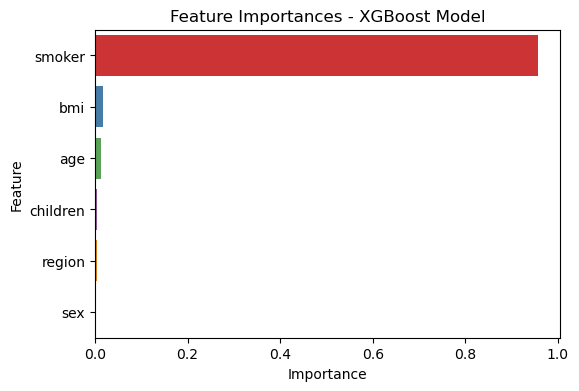

In [63]:
import xgboost as xgb
from xgboost import XGBRegressor


# Assuming you have already defined X_train and y_train

# Create an instance of the XGBoost regressor model
XG = XGBRegressor()

# Fit the model to the training data
XG.fit(X_train, y_train)

# Get feature importances
importances = XG.feature_importances_

# Get feature names from X_train
feature_names = X_train.columns

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances - XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Based on the feature importances, we can see that the sex and region independent variables are not very important in determining the medical charges/insurance cost for an individual.

In [65]:
filename = 'XGBRegressor.pkl'
pickle.dump(XG, open(filename, 'wb'))

# THANK YOU